#Image Convolution

We will learn how to solve some computer vision problems using convoltional neural networks.

### Plan
1. Work with pictures using **Python**, **NumPy** and **PyTorch**
2. Apply constant convolutions to images
3. Compare the performance of fully connected and convolutional networks on the MNIST dataset

In [7]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Image processing with **Python**, **NumPy** and **PyTorch**


In [1]:
# Download image
!wget https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg

--2024-01-19 05:42:51--  https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73801 (72K) [image/jpeg]
Saving to: ‘butterfly.jpg’

butterfly.jpg       100%[===================>]  72.07K  --.-KB/s    in 0.01s   

2024-01-19 05:42:52 (5.67 MB/s) - ‘butterfly.jpg’ saved [73801/73801]



Image format: JPEG; shape: (640, 427); color scheme: RGB


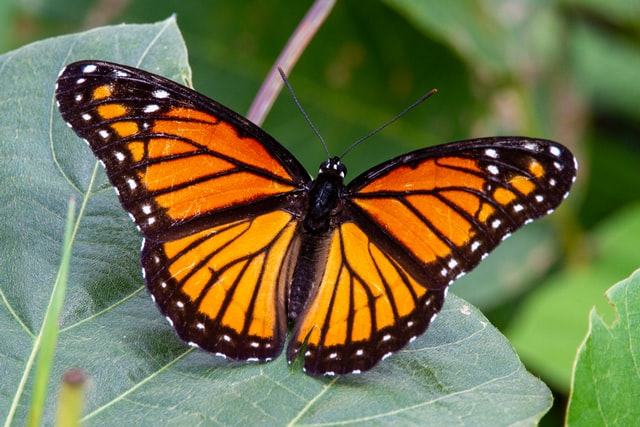

In [3]:
# !pip install Pillow
from PIL import Image

img = Image.open("butterfly.jpg")
print(f"Image format: {img.format}; shape: {img.size}; color scheme: {img.mode}")
img

### Matrix representation of an image

We know that a color image consists of 3 numeric matrices or a 3D tensor.
Each matrix corresponds to one of 3 basic colors: red, green and blue.

Image array shape: (427, 640, 3)


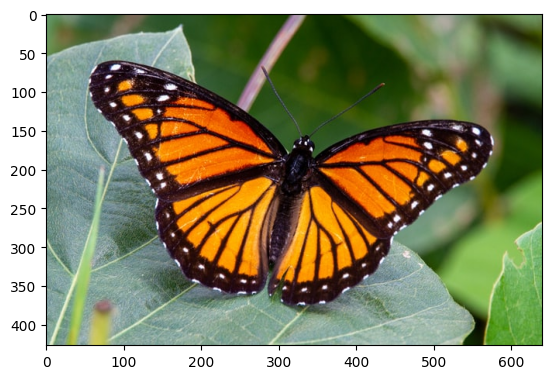

In [8]:
# Convert the image to an array
img_matrix = np.array(img)

# (height, width, number of channels)
print(f"Image array shape: {img_matrix.shape}")

plt.imshow(img_matrix)
plt.show()

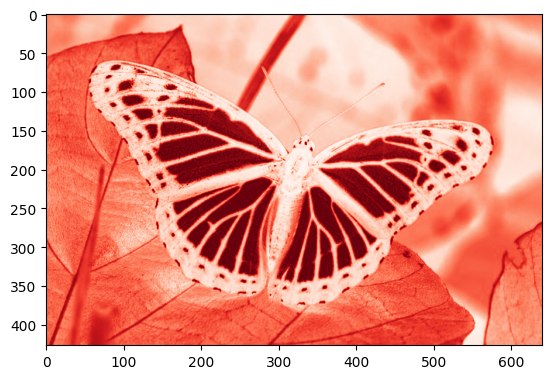

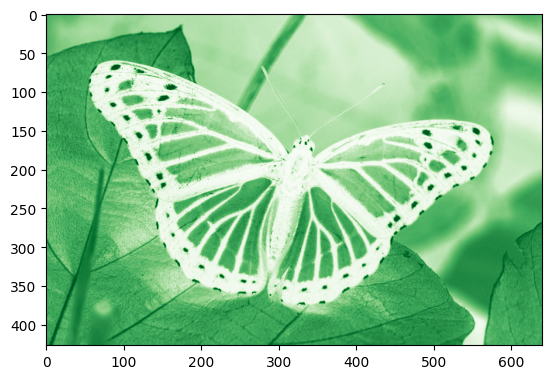

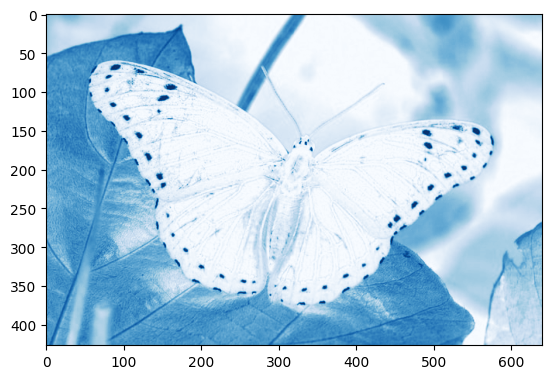

In [9]:
# Let's look at each channel of the image separately
plt.imshow(img_matrix[:, :, 0], cmap=cm.Reds)
plt.show()

plt.imshow(img_matrix[:, :, 1], cmap=cm.Greens)
plt.show()

plt.imshow(img_matrix[:, :, 2], cmap=cm.Blues)
plt.show()

## 2. Apply convolution with constant filter to our image

### Class torch.nn.Conv2d

In [10]:
import torch.nn as nn

nn.Conv2d

torch.nn.modules.conv.Conv2d

In **PyTorch** convolutional layer: `torch.nn`, class [`Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) with parameters:
- `in_channels`
- `out_channels`
- `kernel_size`
- `stride`
- `padding`
- `padding_mode` (`'zeros'`, `'reflect'`, etc.)
- `dilation`

#### `kernel_size`

`int`, if the kernel is a square, and a tuple of two numbers if the kernel is rectangular. Specifies the size of the filter used for convolution on the image.

kernel_size=3

You can see the animations are here:
https://github.com/vdumoulin/conv_arithmetic.

#### `stride`

**Stride**. Specifies the step, in pixels, by which the filter is shifted.
`int` if it moves the same number of pixels horizontally and vertically. A tuple of two numbers if the shifts are different.



#### `padding`

**Padding**. The number of pixels that are added to the image. Similar to the step and kernel size, it can be either `int` or a tuple of two numbers.

### Image Convolution

How can convolution be useful when working with images?
Convolutions detect **patterns in pictures**—colors and combinations of colors, as well as small objects.
Filter/kernel values are trainable parameters.

However, there are "pre-trained" convolutions tuned to specific patterns.

For example, the Sobel operator (convolution with specific parameters) is used for edge detection in an image.
Let's apply this operator.
To do this, for now, let's not use the `torch.nn.Conv2d` class but instead, use the corresponding function from the `torch.nn.functional` module.


In [ ]:
import torch

# In this module, there are essentially the same operators as in `torch.nn`,
# but they are represented not as classes but as functions.
from torch.nn.functional import conv2d

Convert the image to a tensor and rearrange the dimensions in the order `(batch_size, n_channels, height, width)`, which is the convention in PyTorch.


In [ ]:
img_matrix.shape

(427, 640, 3)

In [ ]:
img_tensor = torch.tensor(img_matrix, dtype=torch.float)
img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)
img_tensor.size()

torch.Size([1, 3, 427, 640])

Let us define the Sobel operator for detecting horizontal boundaries

In [ ]:
sobel_hor = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
]

# One matrix for each channel of the image
kernel = [[sobel_hor, sobel_hor, sobel_hor]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size()

torch.Size([1, 3, 3, 3])

In [ ]:
# Convolution with Sobel kernel
img_conv_hor = conv2d(img_tensor, kernel)
img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size()

torch.Size([1, 425, 638, 1])

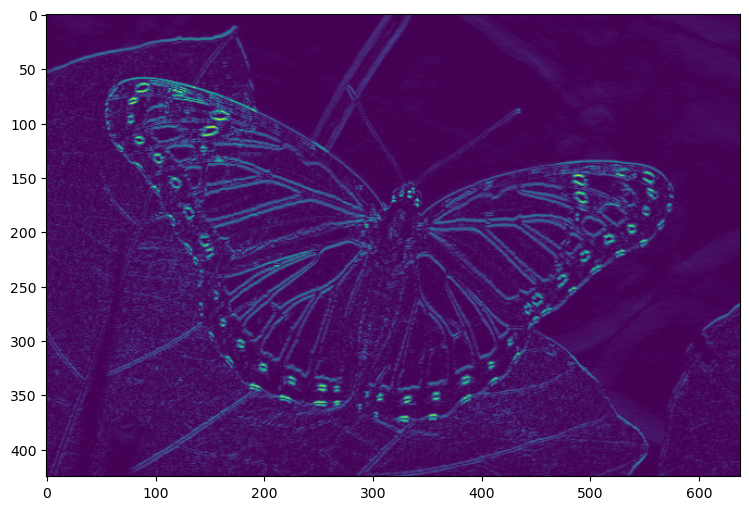

In [ ]:
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show()

# Similarly, let's do the same for detecting vertical edges

In [ ]:
sobel_ver = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]

# One matrix for each channel of the image
kernel_ver = [[sobel_ver, sobel_ver, sobel_ver]]
kernel_ver = torch.tensor(kernel_ver, dtype=torch.float)

img_conv_ver = conv2d(img_tensor, kernel_ver)

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)
img_conv_ver.size()

torch.Size([1, 425, 638, 1])

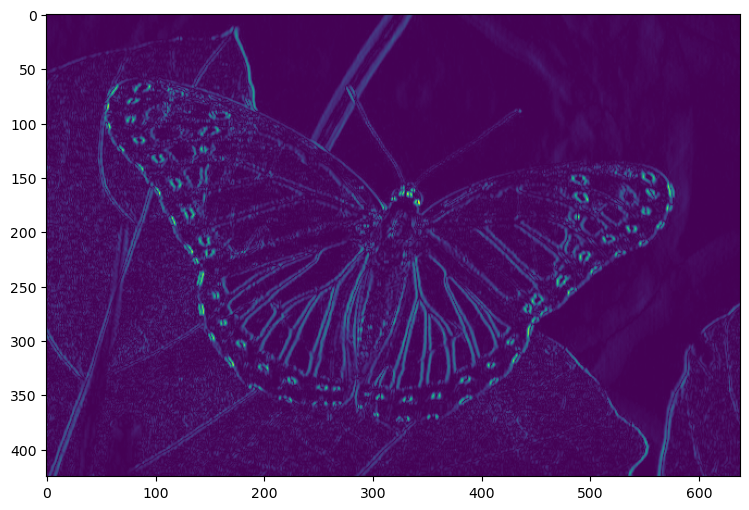

In [ ]:
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

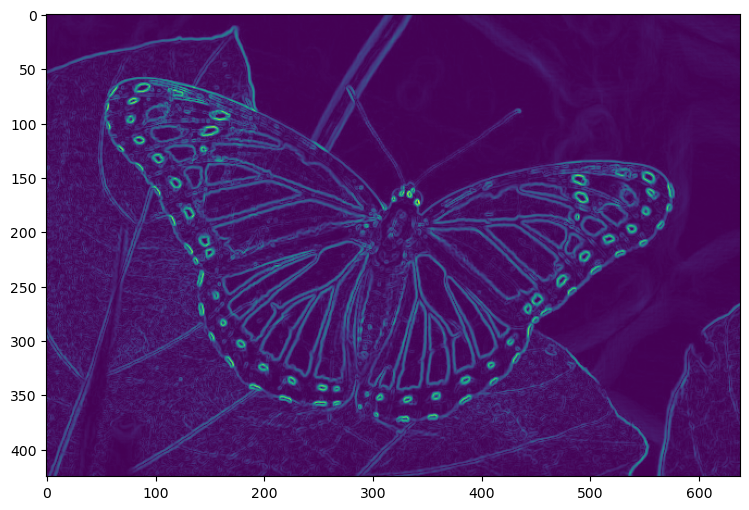

In [ ]:
# Combine the two convolutions (horizontal and vertical edges)
img_conv = torch.sqrt(img_conv_ver**2 + img_conv_hor**2)

plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(img_conv[0, :, :, 0])
plt.show()

### Exercise 1
Similar to the example above, convolve the image with a random kernel of the same size.

In [ ]:
kernel = torch.randn(1, 3, 3, 3)
img_conv_random = conv2d(img_tensor, kernel)
img_conv_random = img_conv_random.permute(0, 2, 3, 1)

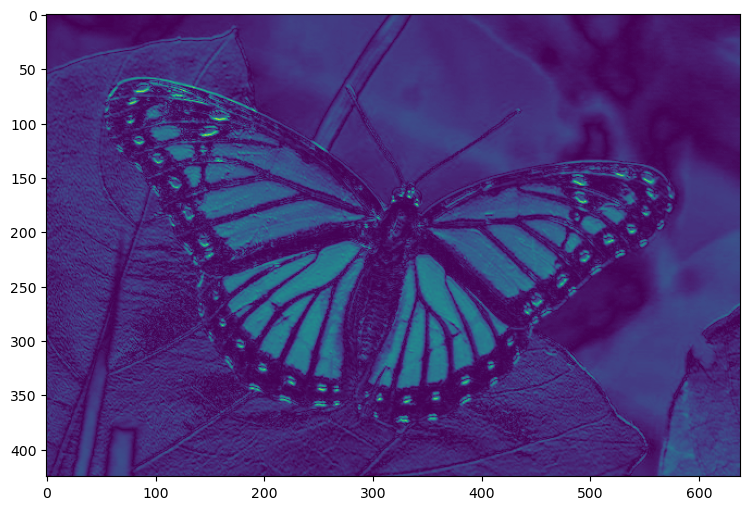

In [ ]:
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_random[0, :, :, 0]))
plt.show()

### Comparing Fully Connected and Convolutional Networks on the MNIST Dataset

First, let's solve the image classification task with a fully connected neural network from the previous seminar.


In [ ]:
import torch.nn.functional as F
import torchvision
from torch import nn

Let's download and prepare the familiar data for classification.


In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [ ]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

mnist_train = MNIST(
    "./mnist/", train=True, download=True, transform=transform
)
mnist_val = MNIST(
    "./mnist/", train=False, download=True, transform=transform
)


train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
val_dataloader = DataLoader(mnist_val, batch_size=64, shuffle=False)

Let's prepare the training loop.

In [ ]:
def train(model, optimizer, n_epochs=5, wandb_project=None):
    """Function for training a neural network.

    Parameters
    ----------
    model : nn.Module
        Neural network for training.
    optimizer : torch.optim.Optimizer
        Optimization algorithm for hyperparameter updates (e.g., SGD).
    n_epochs : int, default 5
        Number of epochs for training the neural network. An epoch is a pass through
        the dataset with the optimization algorithm updating hyperparameters.
    wandb_project : str, default None
        WandB project name for logging the training process (optional).
    """
    # Connect to wandb
    if wandb_project:
        import wandb
        wandb.init(project=wandb_project)
        wandb.watch(model)

    for epoch in range(n_epochs):
        # Training
        for x_train, y_train in tqdm(train_dataloader):
            y_pred = model(x_train)
            loss = F.cross_entropy(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation
        if epoch % 2 == 0:
            val_loss = []
            val_accuracy = []

            # Turn off gradient calculation for validation
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_pred = model(x_val)
                    loss = F.cross_entropy(y_pred, y_val)
                    val_loss.append(loss.numpy())
                    val_accuracy.extend(
                        (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                    )

            if wandb_project:
                wandb.log(
                    {"mean val loss": np.mean(val_loss),
                     "mean val accuracy": np.mean(val_accuracy)}
                )

            # Print metrics
            print(
                f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
            )

Train a Fully-Connected NN.

In [ ]:
model = nn.Sequential(
    nn.Flatten(),  # Convert the 28x28 image to a vector of size 784
    nn.Linear(
        28 * 28, 128
    ),  # Linear layer transforming a vector of size 784 to a vector of size 128
    nn.ReLU(),  # Non-linearity
    nn.Linear(
        128, 10
    ),  # Linear layer transforming a vector of size 128 to a vector of size 10
)

optimizer = torch.optim.SGD(
    model.parameters(), lr=0.01
)  # Create an optimizer and pass the model parameters to it

In [ ]:
print(
    f"Training model with {sum([x[1].numel() for x in model.named_parameters()])} parameters"
)
train(model, optimizer, wandb_project=None)

Training model with 101770 parameters


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.31559237837791443, accuracy: 0.913


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.22445937991142273, accuracy: 0.9358


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 0.17998099327087402, accuracy: 0.9483


Let's modify the architecture by adding convolutional layers to it.


In [ ]:
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1, out_channels=10, kernel_size=5
    ),  # Add a convolutional layer with 10 kernels
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),  # Reduce the image size by a factor of 4 on each side
    nn.Flatten(),  # Convert the 6x6x10 image to a vector of size 360
    nn.Linear(
        6 * 6 * 10, 128
    ),  # Linear layer transforming a vector of size 360 to a vector of size 128
    nn.ReLU(),  # Non-linearity
    nn.Linear(
        128, 10
    ),  # Mapping to the space of dimensionality equal to the number of classification labels
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
print(
    f"Training model with {sum([x[1].numel() for x in model.named_parameters()])} parameters"
)
train(model, optimizer, wandb_project=None)

Training model with 47758 parameters


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.24265284836292267, accuracy: 0.9303


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.10732001811265945, accuracy: 0.9692


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07450747489929199, accuracy: 0.9779


### Task 2

Similarly to the previous example, train a neural network with the following layers:

- Convolutional layer with 10 kernels of size 5
- ReLU activation function
- Reduce the image size by a factor of 2 in each dimension
- Convolutional layer with 20 kernels of size 5
- ReLU activation function
- Reduce the image size by a factor of 2 in each dimension
- Fully connected layer with 128 neurons
- ReLU activation function
- Output layer

Code the solution in two ways:
 - using the `nn.Sequential` class
 - as a subclass of the `torch.nn.Module` class


In [ ]:
# 1st solution
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(4 * 4 * 20, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [ ]:
# 2nd approach
class ConvNetMNIST(nn.Module):

    def __init__(self):
        """Create an object of the class. You can modify the parameters of the network
        through additional arguments."""
        # initialize the parent class
        super().__init__()

        # store the components of the network in attributes
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv_2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.relu = nn.ReLU()  # used 3 times
        self.pool = nn.MaxPool2d(kernel_size=2)  # used 2 times
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(4 * 4 * 20, 128)
        self.fc_2 = nn.Linear(128, 10)

    def forward(self, x: torch.tensor) -> torch.tensor:
        """Forward pass through the neural network. Compute predictions."""
        pred = self.conv_1(x)
        pred = self.relu(pred)
        pred = self.pool(pred)
        pred = self.conv_2(pred)
        pred = self.relu(pred)
        pred = self.pool(pred)
        pred = self.flatten(pred)
        pred = self.fc_1(pred)
        pred = self.relu(pred)
        pred = self.fc_2(pred)

        return pred

model = ConvNetMNIST()

The code written using the first approach is more concise and easier to read. However, not all architectures can be represented as a sequential application of operators from `torch.nn`. Additionally, some operators may be repeated. Therefore, more often, a neural network is defined using the second approach, using a class that inherits from `nn.Module`.


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(
    f"Training model with {sum([x[1].numel() for x in model.named_parameters()])} parameters"
)

train(model, optimizer)

Training model with 47658 parameters


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.1962166577577591, accuracy: 0.9417


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09165237843990326, accuracy: 0.9716


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, loss: 0.05752464011311531, accuracy: 0.9822
